# Julia Tutorial

## PyData DC 2016

**Chase Coleman**

## What is needed to follow along

Before we get started, anyone who wants to follow along should do two things:

1. Get Julia by going to http://julialang.org/downloads/ and downloading the appropriate version of Julia
2. Once you've installed Julia, open it and type `Pkg.add("IJulia")` <-- This adds a Julia kernel to Jupyter and will allow you to open my notebook which you will download in step 3.
3. Download this notebook and other materials by "gitting" them from https://github.com/cc7768/PyDataDC_julia

Please do this as you come in and sit down.

# Who am I?

* PhD student in economics at NYU Stern
* Lead developer of [QuantEcon](http://quantecon.org/index.html)


Both of these roles build up to me trying Julia for the first time -- That and persistent harassment from [Spencer Lyon](http://spencerlyon.com/) who is also a PhD student in economics at NYU Stern and a lead developer of QuantEcon.

# What is Julia?

[Julia](http://julialang.org/) is a new(ish) programming language designed to be both high-level and high-performant.

The current release is 0.5.0.

## High-level

* <font color="green"> Simple syntax </font>
* <font color="green"> Dynamic types </font>
* <font color="green"> Prevents excess verbosity </font>
* <font color="green"> Rapid prototyping </font>

## (Potentially) High-performance

* <font color="green"> Compiled (JIT) </font>
* <font color="green"> Helps solve two language problem (Julia is mainly implemented in Julia) </font>

* <font color="red"> Sometimes naively written code suffers performance penalties (though this is true in all languages) </font>

## Hello World

In [ ]:
println("Hello Julia World")

## Syntax Overview

Brief overview of basic Julia syntax

In [ ]:
# Learn by example
function bisect(f::Function, a, b; maxiter=500, tol=1e-8)
    fa, fb = f(a), f(b)
    fa*fb > 0 ? error("f(a) and f(b) must have different signs") : nothing

    for i=1:maxiter
        c = (a+b)/2
        fc = f(c)

        abs(fc) > tol ? nothing : return (c, fc)

        if fa*fc > 0.0
            a = c
             fa = fc
        else
            b = c
            fb = fc
        end
    end

    error("Failed to converge in $maxiter iterations")
end

## Shorthand Function Definition

In [ ]:
f(x::Float64) = x^3;  # Normal function definition
f1 = x -> x^3;  # Anonymous function

In [ ]:
println(bisect(f, -2.0, 0.5))
println(bisect(f1, -2.0, 0.5))

## Comprehensions

In [ ]:
x = collect(linspace(0, 2π, 50))
sin_x = [sin(i) for i in x];
println(sin_x[1:5])

## Broadcasting with matrices

Many matrix operations look like their Matlab counterparts

In [ ]:
a = eye(2);  # Identity matrix
b = 2.0 * ones(2, 2);  # Matrix of all ones

println(a ./ b)  # elementwise divide
println(a .* b)  # elementwise multiply
println(a*b)  # matrix multiplication
println(a \ b[:, 1])  # solve a x = b
println(ones(2, 1) .+ ones(1, 3))  # Broadcasting tricks

## Vectorization

There is a relatively new `.` convention (mimics the notation for broadcasting) in Julia that transforms scalar functions into a vectorized function -- If you're interested in the details, see this github [issue](https://github.com/JuliaLang/julia/pull/17300)

In [ ]:
f_x = f.(x)  # This function only knew how to operate on Float64s
sin_x = sin.(x)
println(sin_x[1:5])
println(f_x[1:5])

# Types

Understanding Julia's type system will help write smart "Julian" code. Two "laws" of Julia:

* Everything in Julia has a type
* Every type in Julia has a "Parent type" -- Parent-Child/Abstract Base Class

## Type Hierarchy Example

![alt text](./images/Type-hierarchy-for-julia-numbers.png "Type Hierarchy")

Image is from [wikibooks](https://en.wikibooks.org/wiki/Introducing_Julia/Types) and is licensed under [CC BY-SA](http://creativecommons.org/licenses/by-sa/4.0)

In [ ]:
println(typeof(1.0))
println(typeof(1))
println(typeof(true))
println(typeof("A"))
println(typeof("ABC"))
println(typeof(Int8(10)))
println(typeof(ones(3)))

## Multiple Dispatch

**Disclaimer: I'm not a computer scientist, this is how I understand this concept and it is possibly wrong.**

Object oriented languages, like Python, are by nature "single dispatch." Single dispatch is where the functions are specialized based on the type of their first argument -- Think about the `self` argument for class methods. Multiple dispatch is where functions are "specialized" based on the types of all of arguments.

To understand, let's see some examples.

In [ ]:
# My dumb function
function mdf(a::Any, b::Any)
    println("The type of a is $(string(typeof(a)))")
    println("The type of b is $(string(typeof(b)))")

    return nothing
end

In [ ]:
mdf(1, 1)
mdf(sum, 1//2)

In [ ]:
mdf(a::Number, b) = println("a is a number")
mdf(a, b::Number) = println("b is a number")

function mdf(a::Number, b::Number)
    println("Ha! We're both numbers!!!")

    return nothing
end

In [ ]:
# Remember some of these returned something
# different before we defined a more specialized method
mdf(1, 1)
mdf(sum, 1//2)
mdf(0.0, sum)

## Type Parameters

Notice that below when we ask Julia the type of an array it gives us some additional information -- In particular, it tells us `Array{Float64, 1}`.

The information inside the curly brackets is referred to as "type parameters." Type parameters will allow us to further specialize our functions.

In [ ]:
typeof(ones(3))

In [ ]:
function mdf{T<:AbstractFloat}(a::Vector{T}, b::Vector{T})
    println("a and b are vectors with some kind of Float")

    return nothing
end

function mdf{T<:Integer}(a::Vector{T}, b::Vector{T})
    println("a and b are vectors with some kind of integer")

    return nothing
end

In [ ]:
mdf(ones(3), ones(3))
mdf(ones(Int, 3), ones(Int, 3))

## User Types

User defined types in Julia are a good idea. If you write Julia code, you should use your own types.

When you do start defining your own types, do so [intelligently](http://docs.julialang.org/en/release-0.5/manual/performance-tips/#type-declarations) and as always it is recommended that you RTFD.

### Type Example

# Package System

One of the tools that Julia provides is a built in package manager.

All of the package manager commands are within the `Pkg` module, and are called by `Pkg.command(arg)`.

Two types of packages

* Registered: Mature package that has some sense of approval from the community
* Unregistered: Less mature package that maybe is still developing basic functionality

## Adding and Removing Packages

In [ ]:
# Adds a registered package
Pkg.add("ForwardDiff")

# Adds unregistered package
Pkg.clone("https://github.com/cc7768/CHull2d.jl.git")

In [ ]:
Pkg.rm("CHull2d")

## Updating Packages

Packages can be updated to their most recent version by using `Pkg.update()`

Running this command will update:

- Your local `METADATA`, which tracks all versions of registered packages
- Registered packages to latest version
- Unregistered packages to most recent commit on active branch

Doesn't update "dirty" packages (`git status` $\neq$ clean)

## Plotting Packages

At first glance it looks like a bit of a battle field

* `PyPlot`
* `Gadfly`
* `PlotlyJS`
* `GR`
* `PGFPlots`
* `UnicodePlots`
* ...


Luckily, `Plots` gives us a simple set of commands to make plots and allows us access to most any of these plotting packages as the backend.

We will only do a simple example of this, but I highly recommend reading the Plots [documentation](https://juliaplots.github.io/). The documentation is thorough and well maintained (3 gold stars to Tom Breloff!)

In [1]:
using Plots

INFO: Precompiling module PyPlot.



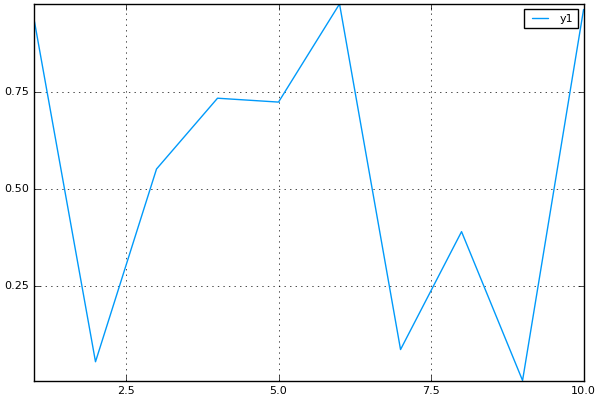

In [7]:
# plotlyjs()
# unicodeplots()
# pyplot()

plot(rand(10))

# Performance "gotchas"

In [ ]:
using BenchmarkTools

## Type Stability

In [ ]:
function my_sum_unstable(N::Int)
    total = 0
    for i=1:N
        total += i / N
    end

    return total
end

function my_sum_stable(N::Int)
    total = 0.0
    for i=1:N
        total += i / N
    end

    return total
end

In [ ]:
@benchmark my_sum_stable(10_000_000)

In [ ]:
@benchmark my_sum_unstable(10_000_000)

In [ ]:
@code_warntype my_sum_stable(10)

In [ ]:
@code_warntype my_sum_unstable(10)

## Access Memory Columnwise

Julia is column-major which is especially important to be aware of if you do most of your programming in Python (which is row-major).

In [ ]:
function column_sum(A)
    nrow, ncol = size(A)

    total = 0.0
    for c=1:ncol
        for r=1:nrow
            total = total + A[r, c]
        end
    end

    return total
end

function row_sum(A)
    nrow, ncol = size(A)

    total = 0.0
    for r=1:nrow
        for c=1:ncol
            total = total + A[r, c]
        end
    end

    return total
end

In [ ]:
A = randn(10_000, 10_000);

In [ ]:
@benchmark column_sum(A)

In [ ]:
@benchmark row_sum(A)